In [1]:
from pyteomics.mass.mass import isotopic_composition_abundance,isotopologues
import matplotlib.pyplot as plt
from Chemometrics.import_common import *
%matplotlib inline
from pyteomics.mass import mass
from Chemometrics.mass_utils import *

In [2]:
N = 20
body_ = mass.Composition('C22H44O2')
fac_ = mass.Composition('C2H4O1')
isotopes = []
for n in range(N):
    formula = body_ + n*fac_
    isotopes.append((i,isotopic_composition_abundance(iso)) for iso in isotopologues(formula))

In [3]:
#p = [(mass.calculate_mass(i),isotopic_composition_abundance(i)) for i in isotopologues(mass.Composition('C22H100'))]

In [4]:
formula = pd.read_excel('TW80分子式.xlsx')

In [5]:
formula.loc[:,'Na'] = 1
formula.head()

,C,H,O,Na
0,6,12,5,1
1,8,16,6,1
2,10,20,7,1
3,12,24,8,1
4,14,28,9,1


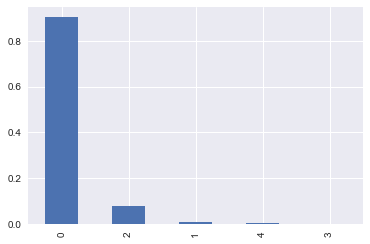

In [6]:
a = molecule_isodist(formula.to_dict(orient='records')[1]).sort_values(by='relative_abundance', ascending=False)
a.relative_abundance.plot.bar()

# data distribution

In [7]:
data = read_mzxml('data010.mzXML')

In [8]:
from numba import jit

@jit
def _hit(top5_iso, threshold_=.00001):
    hit_ = np.abs(data.mz.values - top5_iso.Mass.values[:, np.newaxis]) < threshold_
    hit_ = np.any(hit_, axis=1)
    return hit_

In [9]:
_e = formula.to_dict(orient='records')
top5_ = (molecule_isodist(x).sort_values(by='relative_abundance', ascending=False).head() for x in _e)
a = (sum(_hit(x)) for x in top5_)